In [14]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm
from typing import Union

**MANDELBROT SET**

In [37]:
#Needed packages:
    #np.warnings.filterwarnings("ignore")
    #import numpy as np
    #import matplotlib.pyplot as plt
    #import matplotlib.cm
    #from typing import Union

def mandelbrot_set(Cr_min: Union[int,float], Cr_max: Union[int,float], Ci_min: Union[int,float], Ci_max: Union[int,float], n: int, k: int, colormap: str):
    """ Function to plot Mandelbrot set
    Args:
        Cr_min(int or float): minimal value of real (x) axis   
        Cr_max(int or float): maximal value of real (x) axis   
        Ci_min(int or float): minimal value of imaginary (y) axis   
        Ci_max(int or float): maximal value of imaginary (y) axis   
        n(int): resolution of final image (n*n)
        k(int): number of iterations
        colormap(str): colormap used for the plot
    Returns:
        nothing
    Recommended initial args:
        Cr_min = -2
        Cr_max = 2
        Ci_min = -2
        Ci_max = 2
        n = 1000
        k=100
        colormap='prism'
    """
    #ignore warnings
    np.warnings.filterwarnings("ignore")

    #create meshgrid of all complex numbers in Cr and Ci bounds
    Cr = np.linspace(Cr_min, Cr_max, n)
    Ci = np.linspace(Ci_min, Ci_max, n)
    C_real, C_imag = np.meshgrid(Cr, Ci)
    C = C_real + 1j*C_imag
    
    #create matrix to store intermediate results
    matrix = np.zeros((n,n))
    #as per the Mandelbrot set definition, z0 is always 0
    z = 0

    #iterate for given number of times (k)
    for i in range(k):
        #compute next number as per the Mandelbrot set deifnition
        z = z**2 + C
        #create divergence matrix (True, False values) by comparing all numbers to 2
        m = np.sqrt(z.real**2 + z.imag**2)<2
        #convert True-False values to 1-0 values
        m = (np.abs(z) < 2).astype(int)
        #add modified divergence matrix to the final matrix
        matrix = matrix + m
    #set figure size
    fig, ax = plt.subplots(figsize=(20, 12))

    tics = [0, 200, 400, 600, 800, 1000]
    ax.set_xticks(tics)
    step_Cr = (Cr_max-Cr_min)/5
    step_Ci = (Ci_max-Ci_min)/5
    ax.set_xticklabels([round(Cr_min,2), round(Cr_min+step_Cr,2), round(Cr_min+2*step_Cr,2), round(Cr_min+3*step_Cr,2), round(Cr_min+4*step_Cr,2), round(Cr_max,2)])
    ax.set_yticks(tics)
    ax.set_yticklabels([round(Ci_max,2), round(Ci_min+4*step_Ci,2), round(Ci_min+3*step_Ci,2), round(Ci_min+2*step_Ci,2), round(Ci_min+step_Ci,2), round(Ci_min,2)])
    #plot finished modified divergence matrix
    ax.imshow(matrix, cmap=colormap)
    #show plot
    #plt.show()

    return


**IPYWIDGETS**

In [39]:
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

Cr_min = -2
Cr_max = 2
Ci_min = -2
Ci_max = 2
n = 1000
k=100
colormap='prism'
#mandelbrot_set(Cr_min)
colormap_text = widgets.Dropdown(options=["prism","flag","gist_ncar","hsv", "gist_rainbow"], description="Select colormap:")
Cr_min_slider = widgets.FloatSlider(min=-2.0, max=2.0, value=-2.0, step=0.01, description="Cr_min_slider")
Cr_max_slider = widgets.FloatSlider(min=-2.0, max=2.0, value=2.0, step=0.01, description="Cr_max_slider")
Ci_min_slider = widgets.FloatSlider(min=-2.0, max=2.0, value=-2.0, step=0.01, description="Ci_min_slider")
Ci_max_slider = widgets.FloatSlider(min=-2.0, max=2.0, value=2.0, step=0.01, description="Ci_max_slider")
interact_manual(mandelbrot_set, Cr_min = Cr_min_slider, Cr_max = Cr_max_slider , Ci_min = Ci_min_slider, Ci_max = Ci_max_slider, n = fixed(1000), k=100, colormap = colormap_text);

interactive(children=(FloatSlider(value=-2.0, description='Cr_min_slider', max=2.0, min=-2.0, step=0.01), Floa…

**IPYWIDGETS TEST**
modified function with point and percents

In [29]:
def mandelbrot_set_test(Cr: Union[int,float], Ci: Union[int,float], zoom: int, n: int, k: int, colormap: str):
    """ Function to plot Mandelbrot set
    Args:
        Cr_min(int or float): minimal value of real (x) axis   
        Cr_max(int or float): maximal value of real (x) axis   
        Ci_min(int or float): minimal value of imaginary (y) axis   
        Ci_max(int or float): maximal value of imaginary (y) axis   
        n(int): resolution of final image (n*n)
        k(int): number of iterations
        colormap(str): colormap used for the plot
    Returns:
        nothing
    Recommended initial args:
        Cr_min = -2
        Cr_max = 2
        Ci_min = -2
        Ci_max = 2
        n = 1000
        k=100
        colormap='prism'
    """
    #ignore warnings
    np.warnings.filterwarnings("ignore")
    Cr_min = -(10000 - zoom)*0.0002 + Cr
    Cr_max = (10000 - zoom)*0.0002 + Cr
    Ci_min = -(10000 - zoom)*0.0002 + Ci
    Ci_max = (10000 - zoom)*0.0002 + Ci

    #create meshgrid of all complex numbers in Cr and Ci bounds
    Cr = np.linspace(Cr_min, Cr_max, n)
    Ci = np.linspace(Ci_min, Ci_max, n)
    C_real, C_imag = np.meshgrid(Cr, Ci)
    C = C_real+ 1j*C_imag
    
    #create matrix to store intermediate results
    matrix = np.zeros((n,n))
    #as per the Mandelbrot set definition, z0 is always 0
    z = 0

    #iterate for given number of times (k)
    for i in range(k):
        #compute next number as per the Mandelbrot set deifnition
        z = z**2 + C
        #create divergence matrix (True, False values) by comparing all numbers to 2
        m = np.sqrt(z.real**2 + z.imag**2)<2
        #convert True-False values to 1-0 values
        m = (np.abs(z) < 2).astype(int)
        #add modified divergence matrix to the final matrix
        matrix = matrix + m
    #set figure size
    fig, ax = plt.subplots(figsize=(20, 12))

    tics = [0, 200, 400, 600, 800, 1000]
    ax.set_xticks(tics)
    step_Cr = (Cr_max-Cr_min)/5
    step_Ci = (Ci_max-Ci_min)/5
    ax.set_xticklabels([round(Cr_min,2), round(Cr_min+step_Cr,2), round(Cr_min+2*step_Cr,2), round(Cr_min+3*step_Cr,2), round(Cr_min+4*step_Cr,2), round(Cr_max,2)])
    ax.set_yticks(tics)
    ax.set_yticklabels([round(Ci_max,2), round(Ci_min+4*step_Ci,2), round(Ci_min+3*step_Ci,2), round(Ci_min+2*step_Ci,2), round(Ci_min+step_Ci,2), round(Ci_min,2)])
    ax.set_xlabel(r'$r$', fontsize=15)
    ax.set_ylabel(r'$i$', fontsize=15)
    #plot finished modified divergence matrix
    ax.imshow(matrix, cmap=colormap)
    #show plot
    #plt.show()

    return

In [30]:
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

Cr = 0
Ci = 0

n = 1000
k=100
colormap='prism'
colormap_text = widgets.Dropdown(options=["prism","flag","gist_ncar","hsv", "gist_rainbow"], description="colormap:")
Cr_slider = widgets.FloatSlider(min=-2.0, max=2.0, value=0.0, step=0.01, description="Cr_slider")
Ci_slider = widgets.FloatSlider(min=-2.0, max=2.0, value=0.0, step=0.01, description="Ci_slider")
zoom_slider = widgets.FloatSlider(min=0, max=9999, value=0, step=1, description="zoom_slider")
interact_manual(mandelbrot_set_test, Cr = Cr_slider, Ci = Ci_slider, zoom = zoom_slider, n = fixed(1000), k=100, colormap = colormap_text);

interactive(children=(FloatSlider(value=0.0, description='Cr_slider', max=2.0, min=-2.0, step=0.01), FloatSlid…

**FUNCTION AS CLASS**

In [30]:
class Mandelbrot:
    """
    A class representing the Mandelbrot set
    The plot axis are r and i - real(horizontal) and imaginary(vertical)

    To generate the Mandelbrot set we start with a number z0=0 and repeatedly apply the function $z=z^2 + C$, where C
        are all points in the complex plane. The points either diverge or converge
        (commonly determined by comparing the numbers to 2). The Mandelbrot set is visualised by coloring the points
        based on whether they escape to infinity or stay bounded.

    Recommended use:
        set = Mandelbrot()
        set.interactivePlot()

    Necessary packages:
        import numpy as np
        import matplotlib.pyplot as plt
        import matplotlib.cm
        from typing import Union
        import ipywidgets as widgets
        from ipywidgets import interact, interactive, fixed, interact_manual

    Attributes:
        Cr(int or float): real part of complex number C (representing the center point of the plot)
        Ci(int or float): imaginary part of complex number C (representing the center point of the plot)
        zoom(int): desired zoom of final plot
        n(int): resolution of final image (n*n)
        k(int): number of iterations
        colormap(str): colormap used in plot
        Cr_min(int or float): real axis minimum value
        Cr_max(int or float): real axis maximum value
        Ci_min(int or float): imaginary axis minimum value
        Ci_max(int or float): imaginary axis maximum value
        C(complex): array of all complex numbers in given bounds 
        matrix(np.ndarray): final (modified) divergence matrix

    Methods:
        run(Cr, Ci, zoom, n, k, colormap)
            assignes given values to Mandelbrot class and calls calculate() and plotMandelbrot() methods
        calculate()
            calculates divegence matrix
        plotSet()
            plots the Mandelbrot set
        interactivePlot()
            creates interactive plot of the Mandelbrot set
    """
    def __init__(self, Cr: Union[int,float], Ci: Union[int,float], zoom: int, n: int, k: int, colormap: str):
        """
        Assignes attributes of Mandelbrot class
        
        Recommended initial parameters are:
            Cr=0, Ci=0, zoom=0, n=1000, k=100, colormap='prism'

        Parameters:
            Cr(int or float): real part of complex number C
            Ci(int or float): imaginary part of complex number C
            zoom(int): desired zoom of final plot
            n(int): resolution of final image (n*n)
            k(int): number of iterations
            colormap(str): colormap used in plot

        Returns:
            none
        """

        self.n = n
        self.k = k
        self.colormap = colormap

        #convert input data to axis limits
        self.Cr_min = -(10000 - zoom)*0.0002 + Cr
        self.Cr_max = (10000 - zoom)*0.0002 + Cr
        self.Ci_min = -(10000 - zoom)*0.0002 + Ci
        self.Ci_max = (10000 - zoom)*0.0002 + Ci
        #create meshgrid of all complex numbers in Cr and Ci bounds
        Cr = np.linspace(self.Cr_min, self.Cr_max, self.n)
        Ci = np.linspace(self.Ci_min, self.Ci_max, self.n)
        C_real, C_imag = np.meshgrid(Cr, Ci)
        #final array of all complex numbers C within given bounds
        self.C = C_real + 1j*C_imag
        
        #create matrix to store results of calculations in CalculateMatrix()
        self.matrix = np.zeros((n,n))

        #ignore unimportant warnings
        np.warnings.filterwarnings("ignore")

    def run(self, Cr: Union[int,float], Ci: Union[int,float], zoom: int, n: int, k: int, colormap: str):
        """
        (Re)assignes attributes of Mandelbrot class

        Parameters:
            Cr(int or float): real part of complex number C
            Ci(int or float): imaginary part of complex number C
            zoom(int): desired zoom of final plot
            n(int): resolution of final image (n*n)
            k(int): number of iterations
            colormap(str): colormap used in plot
            
        Returns:
            none
        """

        self.n = n
        #convert input data to axis limits
        self.Cr_min = -(10000 - zoom)*0.0002 + Cr
        self.Cr_max = (10000 - zoom)*0.0002 + Cr
        self.Ci_min = -(10000 - zoom)*0.0002 + Ci
        self.Ci_max = (10000 - zoom)*0.0002 + Ci
        #create meshgrid of all complex numbers in Cr and Ci bounds
        Cr = np.linspace(self.Cr_min, self.Cr_max, self.n)
        Ci = np.linspace(self.Ci_min, self.Ci_max, self.n)
        C_real, C_imag = np.meshgrid(Cr, Ci)
        #final array of all complex numbers C within given bounds
        self.C = C_real + 1j*C_imag
        self.k = k
        self.colormap = colormap
        #create matrix to store results of calculations in CalculateMatrix()
        self.matrix = np.zeros((n,n))

        #calculate divergence matrix
        self.matrix = self.calculate()
        #plot Mandelbrot set
        self.plotSet()

    def calculate(self) -> np.ndarray:
        """
        Calculates divergence matrix of Mandelbrot set

        Parameters:
            none
            
        Returns:
            modified divergency matrix of Mandelbrot set
        """

        #as per the Mandelbrot set definition, z0 is always 0
        z = 0
        #iterate for given number of times (k)
        for i in range(self.k):
            #compute next number as per the Mandelbrot set deifnition
            z = z**2 + self.C
            #create divergence matrix (True, False values) by comparing all numbers to 2
            m = np.sqrt(z.real**2 + z.imag**2)<2
            #convert True-False values to 1-0 values
            m = (np.abs(z) < 2).astype(int)
            #add modified divergence matrix to the final matrix
            self.matrix = self.matrix + m

        return self.matrix
            
    def plotSet(self):
        """
        Plots the Mandelbrot set

        Parameters:
            none
            
        Returns:
            none
        """

        #set figure size
        fig, ax = plt.subplots(figsize=(20, 12))
        #set axis properties
        tics = [0, 200, 400, 600, 800, 1000]
        ax.set_xticks(tics)
        step_Cr = (self.Cr_max-self.Cr_min)/5
        step_Ci = (self.Ci_max-self.Ci_min)/5
        ax.set_xticklabels([round(self.Cr_min,2), round(self.Cr_min+step_Cr,2), round(self.Cr_min+2*step_Cr,2), round(self.Cr_min+3*step_Cr,2), round(self.Cr_min+4*step_Cr,2), round(self.Cr_max,2)])
        ax.set_yticks(tics)
        ax.set_yticklabels([round(self.Ci_max,2), round(self.Ci_min+4*step_Ci,2), round(self.Ci_min+3*step_Ci,2), round(self.Ci_min+2*step_Ci,2), round(self.Ci_min+step_Ci,2), round(self.Ci_min,2)])
        ax.set_xlabel(r'$r$', fontsize=15)
        ax.set_ylabel(r'$i$', fontsize=15)
        ax.set_title('MANDELBROT SET',fontsize=20)
        #plot finished modified divergence matrix
        ax.imshow(self.matrix, cmap=self.colormap)
        
    def interactivePlot(self):
        """
        Creates interactive plot of the Mandelbrot set using ipywidgets

        Parameters:
            none
            
        Returns:
            none
        """

        #create desired widget elements
        colormap_text = widgets.Dropdown(options=["prism","flag","gist_ncar","hsv", "gist_rainbow"], description="colormap:")
        Cr_slider = widgets.FloatSlider(min=-2.0, max=2.0, value=0.0, step=0.01, description="r coordinates")
        Ci_slider = widgets.FloatSlider(min=-2.0, max=2.0, value=0.0, step=0.01, description="i coordinates")
        zoom_slider = widgets.IntSlider(min=0, max=9999, value=0, step=1, description="zoom")
        k_slider = widgets.IntSlider(min=1, max=1000, value=100, step=1, description="iterations")
        #create interactive plot of the Mandelbrot set
        my_interact_manual = interact_manual.options(manual_name="apply changes")
        my_interact_manual(self.run, Cr = Cr_slider, Ci = Ci_slider, zoom = zoom_slider, n = fixed(1000), k = k_slider, colormap = colormap_text)

        

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm
from typing import Union
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

In [29]:
set = Mandelbrot(0, 0, 0, 10, 100, 'prism')
set.interactivePlot()

interactive(children=(FloatSlider(value=0.0, description='r coordinates', max=2.0, min=-2.0, step=0.01), Float…

**JULIA SET**

In [56]:
def julia_set(Zr_min: Union[int,float], Zr_max: Union[int,float], Zi_min: Union[int,float], Zi_max: Union[int,float], n: int, k:int, Cr: Union[int,float], Ci: Union[int,float], colormap: str):
    """ Function to plot Julia set
    Args:
        Zr_min(int or float): minimal value of real (x) axis   
        Zr_max(int or float): maximal value of real (x) axis   
        Zi_min(int or float): minimal value of imaginary (y) axis   
        Zi_max(int or float): maximal value of imaginary (y) axis   
        n(int): resolution of final image (n*n)
        k(int): number of iterations
        Cr(int or float): real part of the constant C
        Ci(int or float): imaginary part of the constant C
        colormap(str): colormap used for the plot
    Returns:
        nothing
    Recommended initial args:
        Zr_min = -1.5
        Zr_max = 1.5
        Zi_min = -1.5
        Zi_max = 1.5
        n = 1000
        k = 100
        Cr = -0.4
        Ci = 0.6
        colormap = 'prism'
    """
    
    #define complex constant C
    C = Cr+ + 1j*Ci

    #create meshgrid of all complex numbers in Zr and Zi bounds
    z_real = np.linspace(Zr_min, Zr_max, n)
    z_imag = np.linspace(Zi_min, Zi_max, n)
    Z_real, Z_imag = np.meshgrid(z_real, z_imag)
    Z = Z_real + 1j*Z_imag

    #create matrix to store intermediate results
    matrix = np.zeros((n,n))
    #iterate for given number of times (k)
    for i in range(k):
        #compute next number as per the Julia set deifnition
        Z = Z**2 + C
        #create divergence matrix (True, False values) by comparing all numbers to 2
        m = np.sqrt(Z.real**2 + Z.imag**2)<2
        #convert True-False values to 1-0 values
        m = (np.abs(Z) < 2).astype(int)
        #add modified divergence matrix to the final matrix
        matrix = matrix + m
    #set figure size
    plt.figure(figsize=(20,12))
    #plot finished modified divergence matrix
    plt.imshow(matrix, cmap=colormap)
    #show plot
    plt.show()
    
    return

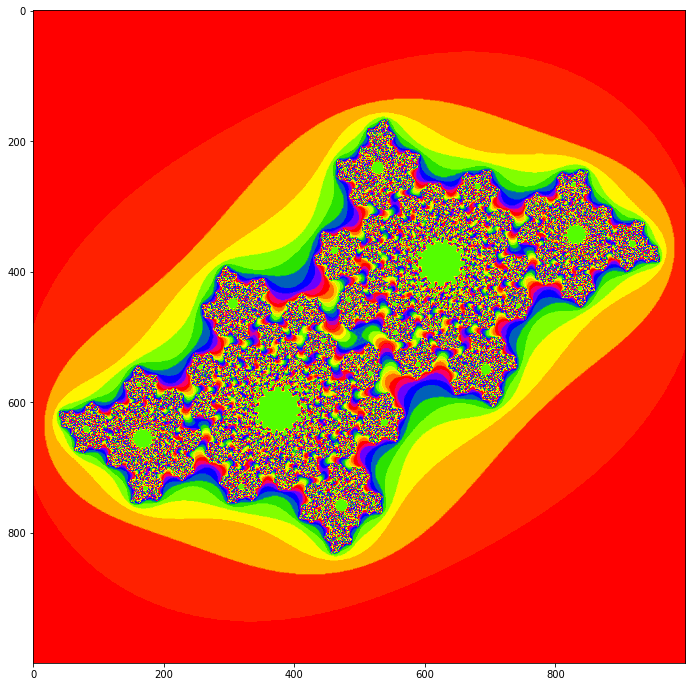

In [30]:
Zr_min = -1.5
Zr_max = 1.5
Zi_min = -1.5
Zi_max = 1.5
n = 1000
k = 100
Cr = -0.4
Ci = 0.6
colormap = 'prism'
julia_set(Zr_min,Zr_max,Zi_min,Zi_max,n,k,Cr,Ci,colormap)

**JULIA WITH COORDINATES**

In [14]:
def julia_set_test(Zr, Zi, n, k, zoom, Cr, Ci, colormap):
    """ Function to plot Julia set
    Args:
        Zr_min(int or float): minimal value of real (x) axis   
        Zr_max(int or float): maximal value of real (x) axis   
        Zi_min(int or float): minimal value of imaginary (y) axis   
        Zi_max(int or float): maximal value of imaginary (y) axis   
        n(int): resolution of final image (n*n)
        k(int): number of iterations
        Cr(int or float): real part of the constant C
        Ci(int or float): imaginary part of the constant C
        colormap(str): colormap used for the plot
    Returns:
        nothing
    Recommended initial args:
        Zr_min = -1.5
        Zr_max = 1.5
        Zi_min = -1.5
        Zi_max = 1.5
        n = 1000
        k = 100
        Cr = -0.4
        Ci = 0.6
        colormap = 'prism'
    """

    np.warnings.filterwarnings("ignore")
    Zr_min = -(10000 - zoom)*0.0002 + Zr
    Zr_max = (10000 - zoom)*0.0002 + Zr
    Zi_min = -(10000 - zoom)*0.0002 + Zi
    Zi_max = (10000 - zoom)*0.0002 + Zi

    #define complex constant C
    C = Cr+ + 1j*Ci

    #create meshgrid of all complex numbers in Zr and Zi bounds
    z_real = np.linspace(Zr_min, Zr_max, n)
    z_imag = np.linspace(Zi_min, Zi_max, n)
    Z_real, Z_imag = np.meshgrid(z_real, z_imag)
    Z = Z_real + 1j*Z_imag

    #create matrix to store intermediate results
    matrix = np.zeros((n,n))
    #iterate for given number of times (k)
    for i in range(k):
        #compute next number as per the Julia set deifnition
        Z = Z**2 + C
        #create divergence matrix (True, False values) by comparing all numbers to 2
        m = np.sqrt(Z.real**2 + Z.imag**2)<2
        #convert True-False values to 1-0 values
        m = (np.abs(Z) < 2).astype(int)
        #add modified divergence matrix to the final matrix
        matrix = matrix + m
    #set figure size
    fig, ax = plt.subplots(figsize=(15, 10))

    tics = [0, 200, 400, 600, 800, 1000]
    ax.set_xticks(tics)
    step_Zr = (Zr_max-Zr_min)/5
    step_Zi = (Zi_max-Zi_min)/5
    ax.set_xticklabels([round(Zr_min,2), round(Zr_min+step_Zr,2), round(Zr_min+2*step_Zr,2), round(Zr_min+3*step_Zr,2), round(Zr_min+4*step_Zr,2), round(Zr_max,2)])
    ax.set_yticks(tics)
    ax.set_yticklabels([round(Zi_max,2), round(Zi_min+4*step_Zi,2), round(Zi_min+3*step_Zi,2), round(Zi_min+2*step_Zi,2), round(Zi_min+step_Zi,2), round(Zi_min,2)])
    ax.set_xlabel(r'$r$', fontsize=15)
    ax.set_ylabel(r'$i$', fontsize=15)
    #plot finished modified divergence matrix
    ax.imshow(matrix, cmap=colormap)
    
    return

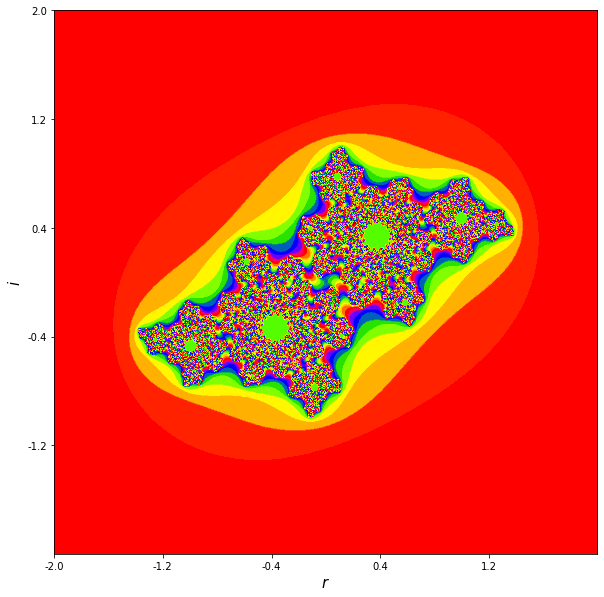

In [15]:
Zr_min = -1.5
Zr_max = 1.5
Zi_min = -1.5
Zi_max = 1.5

n = 1000
k = 100
Cr = -0.4
Ci = 0.6
#Zr, Zi, n, k, zoom, Cr, Ci, colormap
julia_set_test(0,0,n,k,0,Cr,Ci,colormap)

In [16]:
Zr_min = -1.5
Zr_max = 1.5
Zi_min = -1.5
Zi_max = 1.5

n = 1000
k = 100
Cr = -0.4
Ci = 0.6
#Zr, Zi, n, k, zoom, Cr, Ci, colormap
#julia_set_test(0,0,n,k,0,Cr,Ci,colormap)


import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual


n = 1000
k=100
colormap='prism'
colormap_text = widgets.Dropdown(options=["prism","flag","gist_ncar","hsv", "gist_rainbow"], description="colormap:")
Zr_slider = widgets.FloatSlider(min=-2, max=2, value=0.0, step=0.01, description="Zr_slider")
Zi_slider = widgets.FloatSlider(min=-2, max=2, value=0.0, step=0.01, description="Zi_slider")
zoom_slider = widgets.IntSlider(min=0, max=9999, value=0, step=1, description="zoom_slider")
Cr_slider =  widgets.FloatSlider(min=-5.0, max=5.0, value=-0.4, step=0.01, description="Cr_slider")
Ci_slider =  widgets.FloatSlider(min=-5.0, max=5.0, value=0.6, step=0.01, description="Ci_slider")
interact_manual(julia_set_test, Zr = Zr_slider, Zi = Zi_slider, n = fixed(1000), k=100, zoom = zoom_slider, Cr=Cr_slider, Ci=Ci_slider, colormap = colormap_text)

interactive(children=(FloatSlider(value=0.0, description='Zr_slider', max=2.0, min=-2.0, step=0.01), FloatSlid…

<function __main__.julia_set_test(Zr, Zi, n, k, zoom, Cr, Ci, colormap)>

**JULIA SET AS CLASS**

In [4]:
class Julia:
    """
    A class representing the Julia set
    The plot axis are r and i - real(horizontal) and imaginary(vertical)
    
    To generate the Julia set we repeatedly apply the function $Z=Z^2 + C$, where C is a chosen complex constant.
        The points Z either diverge or converge (commonly determined by comparing the numbers to 2).
        The Julia set is visualised by coloring the points based on whether they escape to infinity or stay bounded.
        By changing the complex constant C we get different patterns.

    Recommended use:
        set = Julia(Zr=0, Zi=0, n=1000, k=100, zoom=0, Cr=-0.4, Ci=0.6, colormap='prism')
        set.interactPlot()

    Necessary packages:
        import numpy as np
        import matplotlib.pyplot as plt
        import matplotlib.cm
        from typing import Union
        import ipywidgets as widgets
        from ipywidgets import interact, interactive, fixed, interact_manual

    Attributes:
        n(int): resolution of final image (n*n)
        k(int): number of iterations
        zoom(int): desired zoom of final plot (range 0-10000)
        C(complex): complex constant C
        colormap(str): colormap used in plot
        Zr_min(int or float): real axis minimum value
        Zr_max(int or float): real axis maximum value
        Zi_min(int or float): imaginary axis minimum value
        Zi_max(int or float): imaginary axis maximum value
        Z(complex): array of all imaginary numbers in given bounds 
        matrix(np.ndarray): final (modified) divergence matrix

    Methods:
        run(Zr, Zi, n, k, zoom, Cr, Ci, colormap)
            assignes given values to Julia class and calls calculate() and plotSet() methods
        calculate()
            calculates the (modified) divegence matrix of Julia set
        plotSet()
            plots the Julia set
        interactivePlot()
            creates interactive plot of the Julia set
    """
    def __init__(self, Zr: Union[int,float], Zi: Union[int,float], n: int, k: int, zoom: int, Cr: Union[int,float], Ci: Union[int,float]):
        """
        Constructs attributes of Julia class

        Recommended initial parameters are:
            Zr=0, Zi=0, n=1000, k=100, zoom=0, Cr=-0.4, Ci=0.6, colormap='prism'

        Parameters:
            Zr(int or float): real part of imaginary number Z
            Zi(int or float): imaginary part of imaginary number Z
            n(int): resolution of final image (n*n)
            k(int): number of iterations
            zoom(int): desired zoom of final plot (range 0-10000)
            Cr(int or float): real number of complex constant C
            Ci(int or float): real number of complex constant C
            colormap(str): colormap used in plot

        Returns:
            none
        """

        self.n = n
        self.k = k
        self.colormap = colormap

        #convert input data to axis limits
        self.Zr_min = -(10000 - zoom)*0.0002 + Zr
        self.Zr_max = (10000 - zoom)*0.0002 + Zr
        self.Zi_min = -(10000 - zoom)*0.0002 + Zi
        self.Zi_max = (10000 - zoom)*0.0002 + Zi
        #create meshgrid of all complex numbers in Zr and Zi bounds
        Zr = np.linspace(self.Zr_min, self.Zr_max, self.n)
        Zi = np.linspace(self.Zi_min, self.Zi_max, self.n)
        Z_real, Z_imag = np.meshgrid(Zr, Zi)
        #final array of all complex numbers Z within given bounds
        self.Z = Z_real + 1j*Z_imag

        #define complex constant C
        self.C = Cr+ + 1j*Ci

        #create matrix to store results of calculations in calculate()
        self.matrix = np.zeros((n,n))

        #ignore unimportant warnings
        np.warnings.filterwarnings("ignore")

    def reload(self, Zr: Union[int,float], Zi: Union[int,float], n: int, k: int, zoom: int, Cr: Union[int,float], Ci: Union[int,float], colormap: str):
        """
        (Re)assignes attributes of Julia class

        Parameters:
            Zr(int or float): real part of complex number Z (representing the center point of the plot)
            Zi(int or float): imaginary part of complex number Z (representing the center point of the plot)
            n(int): resolution of final image (n*n)
            k(int): number of iterations
            zoom(int): desired zoom of final plot (range 0-10000)
            Cr(int or float): real part of complex constant C
            Ci(int or float): imaginary part of complex constant C
            colormap(str): colormap used in plot
            
        Returns:
            none
        """

        self.n = n
        self.k = k
        self.colormap = colormap

        #convert input data to axis limits
        self.Zr_min = -(10000 - zoom)*0.0002 + Zr
        self.Zr_max = (10000 - zoom)*0.0002 + Zr
        self.Zi_min = -(10000 - zoom)*0.0002 + Zi
        self.Zi_max = (10000 - zoom)*0.0002 + Zi
        #create meshgrid of all complex numbers in Zr and Zi bounds
        Zr = np.linspace(self.Zr_min, self.Zr_max, self.n)
        Zi = np.linspace(self.Zi_min, self.Zi_max, self.n)
        Z_real, Z_imag = np.meshgrid(Zr, Zi)
        #final array of all complex numbers Z within given bounds
        self.Z = Z_real + 1j*Z_imag

        #define complex constant C
        self.C = Cr+ + 1j*Ci

        #create matrix to store results of calculations in calculate()
        self.matrix = np.zeros((n,n))

        #calculate divergence matrix
        self.matrix = self.calculate()
        #plot Mandelbrot set
        self.plotSet()

    def calculate(self) -> np.ndarray:
        """
        Calculates divergence matrix (self.matrix) of Julia set

        Parameters:
            none
            
        Returns:
            modified divergency matrix of Julia set
        """

        #iterate for given number of times (k)
        for i in range(self.k):
            #compute next number as per the Julia set deifnition
            self.Z = self.Z**2 + self.C
            #create divergence matrix (True/False values) by comparing all numbers to 2
            m = np.sqrt(self.Z.real**2 + self.Z.imag**2)<2
            #convert True-False values to 1-0 values
            m = (np.abs(self.Z) < 2).astype(int)
            #add modified divergence matrix to the final matrix
            self.matrix = self.matrix + m

        return self.matrix
    
    def plotSet(self):
        """
        Plots the Julia set

        Parameters:
            none
            
        Returns:
            none
        """

        #set figure size
        fig, ax = plt.subplots(figsize=(20, 12))
        #set axis properties
        tics = [0, 200, 400, 600, 800, 1000]
        ax.set_xticks(tics)
        step_Zr = (self.Zr_max-self.Zr_min)/5
        step_Zi = (self.Zi_max-self.Zi_min)/5
        ax.set_xticklabels([round(self.Zr_min,2), round(self.Zr_min+step_Zr,2), round(self.Zr_min+2*step_Zr,2), round(self.Zr_min+3*step_Zr,2), round(self.Zr_min+4*step_Zr,2), round(self.Zr_max,2)])
        ax.set_yticks(tics)
        ax.set_yticklabels([round(self.Zi_max,2), round(self.Zi_min+4*step_Zi,2), round(self.Zi_min+3*step_Zi,2), round(self.Zi_min+2*step_Zi,2), round(self.Zi_min+step_Zi,2), round(self.Zi_min,2)])
        ax.set_xlabel(r'$r$', fontsize=15)
        ax.set_ylabel(r'$i$', fontsize=15)
        ax.set_title('JULIA SET',fontsize=20)
        #plot finished modified divergence matrix
        ax.imshow(self.matrix, cmap=self.colormap)
        
    def interactPlot(self):
        """
        Creates interactive plot of the Julia set using ipywidgets

        Parameters:
            none
            
        Returns:
            none
        """

        #create desired widget elements
        colormap_text = widgets.Dropdown(options=["prism","flag","gist_ncar","hsv", "gist_rainbow"], description="colormap:")
        Zr_slider = widgets.FloatSlider(min=-2, max=2, value=0.0, step=0.01, description="Zr_slider")
        Zi_slider = widgets.FloatSlider(min=-2, max=2, value=0.0, step=0.01, description="Zi_slider")
        zoom_slider = widgets.IntSlider(min=0, max=9999, value=0, step=1, description="zoom_slider")
        Cr_slider =  widgets.FloatText(min=-5.0, max=5.0, value=-0.4, step=0.01, description="Cr_slider")
        Ci_slider =  widgets.FloatText(min=-5.0, max=5.0, value=0.6, step=0.01, description="Ci_slider")
        #create interactive plot of the Julia set
        my_interact_manual = interact_manual.options(manual_name="apply changes")
        my_interact_manual(self.reload, Zr = Zr_slider, Zi = Zi_slider, n = fixed(1000), k=100, zoom = zoom_slider, Cr=Cr_slider, Ci=Ci_slider, colormap = colormap_text)

        
    

In [5]:
set = Julia() #Zr=0, Zi=0, n=1000, k=100, zoom=0, Cr=-0.4, Ci=0.6
set.interactPlot()

interactive(children=(FloatSlider(value=0.0, description='Zr_slider', max=2.0, min=-2.0, step=0.01), FloatSlid…

**MATPLOTLIB WIDGETS**

In [8]:
from matplotlib.widgets import Slider as matSlide

In [10]:
np.warnings.filterwarnings("ignore")
def mandelbrot_set_nopic(Cr_min, Cr_max, Ci_min, Ci_max, n, k):
    Cr = np.linspace(Cr_min, Cr_max, n)
    Ci = np.linspace(Ci_min, Ci_max, n)
    C_real, C_imag = np.meshgrid(Cr, Ci)
    C = C_real + 1j*C_imag #vsechny body v rozmezi -2 2 

    #fig = figure(x_range = (Cr_min,Cr_max),y_range=(Ci_min,Ci_max), figsize=(20,12))
    z = 0 #z0 je vzdy 0
    matrix = np.zeros((n,n))
    for i in range(k): #k je pocet iteraci
        #print(i)
        z = z**2 + C
        #body ktere jsou mensi nez 2
        m = np.sqrt(z.real**2 + z.imag**2)<2
        m = (np.abs(z) < 2).astype(int)
        #velmi pomale
        #m = np.array([[1 if np.sqrt(i.real**2 + i.imag**2)<2 else 0 for i in row] for row in z])
        matrix = matrix + m
    return matrix

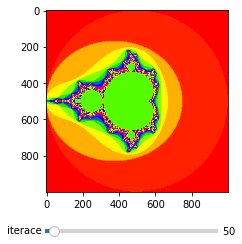

In [22]:
#matplotlib.use('Qt5Agg')


Cr_min = -2
Cr_max = 2
Ci_min = -2
Ci_max = 2
n = 1000
k=100
matrix = mandelbrot_set_nopic(Cr_min, Cr_max, Ci_min, Ci_max, n, k)
fig = plt.figure()#figsize=(20,12)
ax = fig.subplots()
plt.subplots_adjust(bottom=0.25)
p = ax.imshow(matrix, cmap='prism')


k_slide = plt.axes([0.3,0.1,0.4,0.03])#left border, vertical position, width, height
s_factor = matSlide(k_slide, 'iterace', valmin=1, valmax=1000, valinit=50, valstep = 1)
def updateVal(v):
    current = s_factor.val
    matrix = mandelbrot_set_nopic(Cr_min, Cr_max, Ci_min, Ci_max, n, current)
    p.set_data(matrix)
    fi.canvas.draw()
s_factor.on_changed(updateVal)

plt.show()
#axamp = plt.axes([0, 0, 2, 2])
#samp = Slider(axamp, 'Slide', 0, 10, valinit=2)
#samp.on_changed(mandelbrot_set(Cr_min, Cr_max, Ci_min, Ci_max, n, k))

In [62]:
%matplotlib widget

ModuleNotFoundError: No module named 'ipympl'